In [1]:
import pickle

f = open('QCompare1.out', 'rb')
a = pickle.load(f)
a = list(a)

f = open('QCompare2.out', 'rb')
b = pickle.load(f)
b = list(b)

f = open('QCompare3.out', 'rb')
c = pickle.load(f)
c = list(c)

R = a + b + c

In [2]:
print(R)
from operator import itemgetter
R = sorted(R, key=itemgetter(0))

[[0.70674542440439903, 1.0444730780333435, 1.0752089735012667], [0.79508893959833016, 1.1002733856943285, 1.0212487766213141], [0.90867267392508333, 1.1721770490743324, 0.96565203340331152], [1.0601177907332728, 1.2679513305033037, 0.90844917125359503], [1.2721412451995198, 1.4021242329418642, 0.8492504083669008], [1.5901759434715821, 1.6033037903292067, 0.78779757777425052], [2.1202345623202103, 1.9384658380977802, 0.72382345256201808], [3.1803526615732713, 2.6089018190391364, 0.65705056557528485], [6.3606998317102761, 4.6197238969243104, 0.58689522708114195], [0.84148728409387474, 1.0697717338121637, 1.0130196577780013], [0.94667275542033436, 1.1572012257684479, 0.97927683571750634], [1.0819122129911172, 1.2694148574706239, 0.94511979024360449], [1.2622303535237724, 1.4191149644173378, 0.91021206124806187], [1.5146767031462867, 1.6286431070992795, 0.87468433131347156], [1.8933461382648606, 1.942979333245614, 0.83853271093851089], [2.5244581326578652, 2.4670803571875703, 0.80175283645

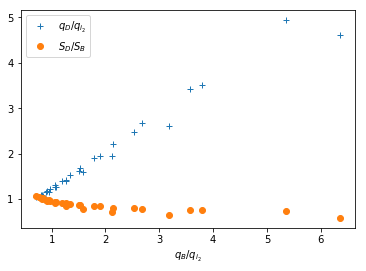

In [3]:
import matplotlib.pyplot as plt
import numpy as np
R = np.array(R)

plt.plot(R[:, 0], R[:, 1], '+', label='$q_D / q_{i_2} $')
plt.plot(R[:, 0], R[:, 2], 'o', label='$S_D / S_B$')
plt.xlabel('$q_B / q_{i_2}$')
plt.legend(loc='upper left')
plt.savefig('SDC_RATIO(no regression).png', dpi=300)
plt.show()

In [4]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(R[:, 0], R[:, 1])
qDE_fit = {'slope': slope, 'intercept': intercept, 'r': r_value, 'p': p_value, 'std_err': std_err}

In [5]:
t = np.arange(0., max(R[:, 0]), 0.01)
y = t*slope + intercept
print(y)

[ 0.51512624  0.52251216  0.52989808  0.53728399  0.54466991  0.55205583
  0.55944175  0.56682767  0.57421359  0.58159951  0.58898543  0.59637135
  0.60375727  0.61114318  0.6185291   0.62591502  0.63330094  0.64068686
  0.64807278  0.6554587   0.66284462  0.67023054  0.67761645  0.68500237
  0.69238829  0.69977421  0.70716013  0.71454605  0.72193197  0.72931789
  0.73670381  0.74408973  0.75147564  0.75886156  0.76624748  0.7736334
  0.78101932  0.78840524  0.79579116  0.80317708  0.810563    0.81794891
  0.82533483  0.83272075  0.84010667  0.84749259  0.85487851  0.86226443
  0.86965035  0.87703627  0.88442219  0.8918081   0.89919402  0.90657994
  0.91396586  0.92135178  0.9287377   0.93612362  0.94350954  0.95089546
  0.95828138  0.96566729  0.97305321  0.98043913  0.98782505  0.99521097
  1.00259689  1.00998281  1.01736873  1.02475465  1.03214056  1.03952648
  1.0469124   1.05429832  1.06168424  1.06907016  1.07645608  1.083842
  1.09122792  1.09861384  1.10599975  1.11338567  1.12

In [6]:
import bezeir_fit as bf
l = np.array([zip(R[:, 0], R[:, 1])])[0]
p, t0 = bf.fit(l, 3, 1.0E-8)

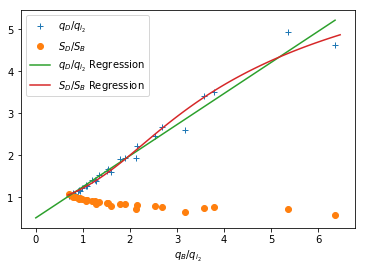

In [7]:
t0 = np.arange(0, 1.0001, 0.01)
P = bf.gen(t0, 3, p)

plt.plot(R[:, 0], R[:, 1], '+', label='$q_D / q_{i_2} $')
plt.plot(R[:, 0], R[:, 2], 'o', label='$S_D / S_B$')
plt.plot(t, y, label='$q_D/q_{i_2}$ Regression')
plt.plot(P[:, 0], P[:, 1], label='$S_D/S_B$ Regression')
plt.xlabel('$q_B / q_{i_2}$')
plt.legend(loc='upper left')
plt.savefig('SDC_RATION(regression).png', dpi=300)
plt.show()

In [8]:
pickle.dump([y, t], open('SD_SB_fit.tmp', 'wb'))

In [9]:
from scipy.interpolate import interp1d
f = interp1d(P[:, 1], P[:, 0])
f(0.82)

array(1.6889738877220006)